0:  1.273968219523382e-13
1:  0.010101245804482552
2:  0.9898987541952897
3:  5.1531453595097475e-14
4:  3.617068566413365e-14
5:  1.2801347482633678e-14


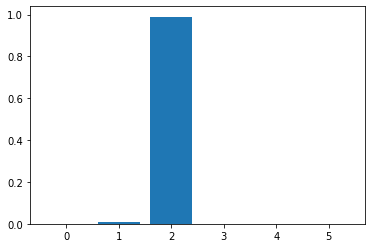

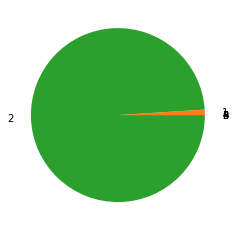

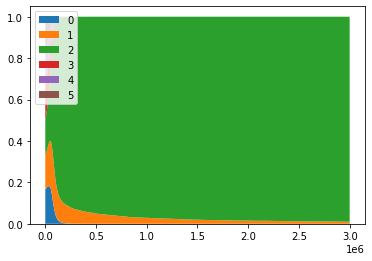

0:  1.5628838878571076e-20
1:  0.010685966809780803
2:  0.9893140331902193
3:  7.782163708852592e-21
4:  4.6394530148407984e-21
5:  1.4630885924587941e-21


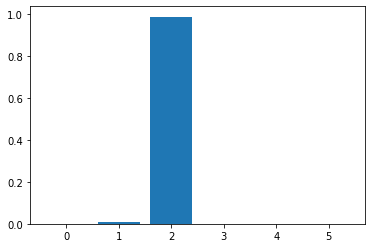

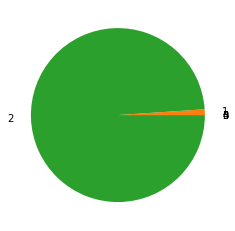

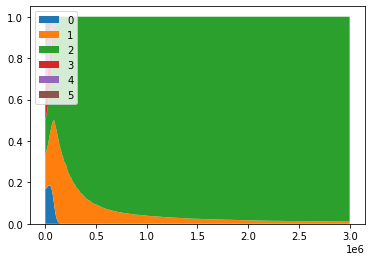

0:  1.3619827011879201e-11
1:  0.009346803562581133
2:  0.990653196419203
3:  2.2476962315108295e-12
4:  1.8107263175622117e-12
5:  5.37561334230537e-13


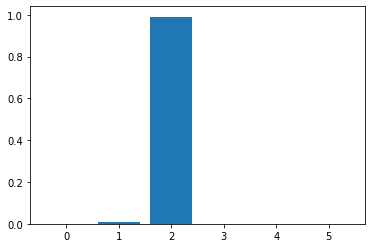

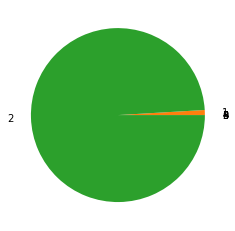

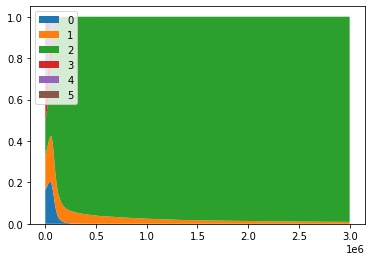

評価用--------------------
[4, 96]
要素なし


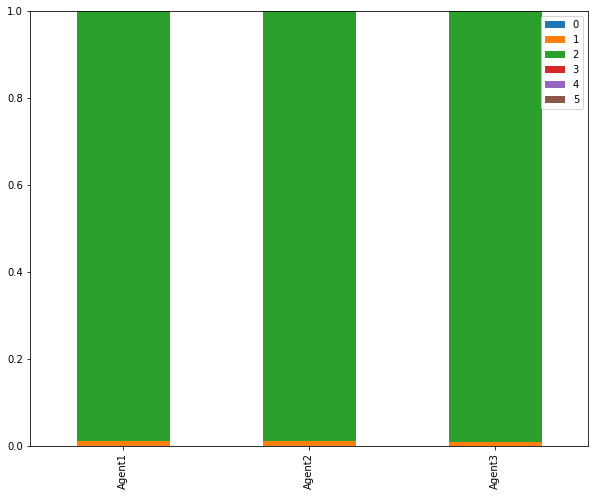

In [2]:
#ノルマに足りなかった分の没収
#実験 6番B型
#ノルマ6枚の場合

import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd
class Dealer:
    def __init__(self):
        self.noruma =6 #ノルマです
    def keisan(self,actions):
        koukyouzai = sum(actions) #公共財の枚数
        if  koukyouzai < self.noruma: #未達成時の処理
          reward = [] #結果
          for a in actions:
            reward.append(5-a+2*koukyouzai/3-(self.noruma-koukyouzai))
          return reward
        else:
            reward = []
            for a in actions:
                reward.append(5-a+2*koukyouzai/3)
            return reward
class Tanzyun_Agent:
  def __init__(self):
    pass
  def acts(self):
    return 5
  def critic(self,reward):
    pass
  def decide_yusen(self):
    pass
  def decide_pi(self):
    pass
class Agent:
    def __init__(self):
        self.alpha = 0.01
        self.beta = 0.00005
        self.actions = [0,1,2,3,4,5]
        self.q_values = np.repeat(2,len(self.actions))
        self.pi = np.repeat(1/6,len(self.actions))
        self.last_action_id = None
        self.yusen = np.repeat(1/6,len(self.actions))
        self.delta = None
        self.pi_history= []
        self.yusen_history = []
        self.reward_his = []
    def acts(self):
        action_id = np.random.choice(len(self.actions),p = self.pi)
        self.last_action_id = action_id
        return action_id
    def decide_pi(self): 
        self.pi_history.append(copy.deepcopy(self.pi))
        bunbo = sum([np.e**aidx for aidx in self.yusen])
        self.pi = [np.e**aidx/bunbo for aidx in self.yusen]
    def critic(self,reward):
        self.delta = reward -self.q_values[self.last_action_id]
        self.q_values[self.last_action_id] = (1-self.alpha)*self.q_values[self.last_action_id] + self.alpha*reward
    def decide_yusen(self):
        self.yusen[self.last_action_id] = self.yusen[self.last_action_id] + self.beta*self.delta*(1-self.pi[self.last_action_id])
    
    
    def shuturyoku(self):
        for a, _ in enumerate(self.pi):
            print(str(a)+":  " +str(self.pi[a]))
        plt.bar(x =[0,1,2,3,4,5],height = self.pi)
        plt.show()
        #オレセン
        print()
        fig,ax = plt.subplots()
        labels = ["0","1","2","3","4","5"]
        ax.pie(self.pi,labels = labels,labeldistance = 1.2)
        print()
        labels = ["0","1","2","3","4","5"]
        pi0his = [self.pi_history[aidx][0] for aidx, _ in enumerate(self.pi_history)]
        pi1his = [self.pi_history[aidx][1] for aidx, _ in enumerate(self.pi_history)]
        pi2his = [self.pi_history[aidx][2] for aidx, _ in enumerate(self.pi_history)]
        pi3his = [self.pi_history[aidx][3] for aidx, _ in enumerate(self.pi_history)]
        pi4his = [self.pi_history[aidx][4] for aidx, _ in enumerate(self.pi_history)]
        pi5his = [self.pi_history[aidx][5] for aidx, _ in enumerate(self.pi_history)]
        fig,ax = plt.subplots()
        ax.stackplot(range(1,len(pi0his)+1),pi0his,pi1his,pi2his,pi3his,pi4his,pi5his,labels = labels)
        ax.legend(loc="upper left")
        plt.show()


if __name__ == "__main__":
    NB_EPISODE = 3000000
    agent1 = Agent()
    agent2 = Agent()
    agent3 = Agent()
    agents = [agent1,agent2,agent3]
    dealer = Dealer()
    for episode in range(NB_EPISODE):
        actions = [i.acts() for i in agents]
        reward = dealer.keisan(actions= actions)
        for q,_ in enumerate(agents):
          agents[q].critic(reward[q])
          agents[q].decide_yusen()
          agents[q].decide_pi()
    for t in agents:
      t.shuturyoku()
    
    #最後にそのルールを評価する
    hyouka = [0,0]
    heikin = []
    for k in range(100):
      actions = [i.acts() for i in agents]
      if sum(actions) < dealer.noruma:
        hyouka[0] += 1
      else:
        if min(actions) < 3:
          hyouka[1] += 1
        else:
          heikin.append(sum(actions) -9)
    try:
      heikin_num = sum(heikin)/len(heikin)
    except ZeroDivisionError:
      heikin_num = "要素なし"
    print("評価用--------------------")
    print(hyouka)
    print(heikin_num)
    matrix = [agent1.pi,agent2.pi,agent3.pi]
    dataset = pd.DataFrame([list(x) for x in zip(*matrix)],columns=["Agent1","Agent2","Agent3"],index=["0","1","2","3","4","5"])
    fig, ax = plt.subplots(figsize=(10, 8))
    dataset.T.plot(kind='bar', stacked=True, ax=ax)
    plt.show()

0:  0.018023332173187308
1:  0.9819766545133496
2:  9.04722952015313e-09
3:  2.612662155224572e-09
4:  9.84953978706293e-10
5:  6.686177288659939e-10


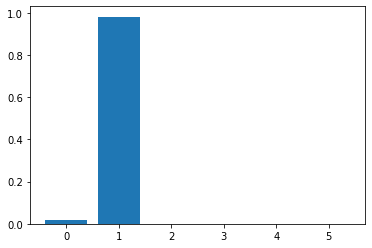

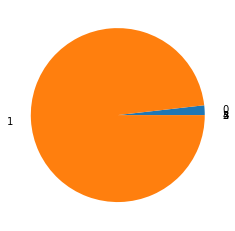

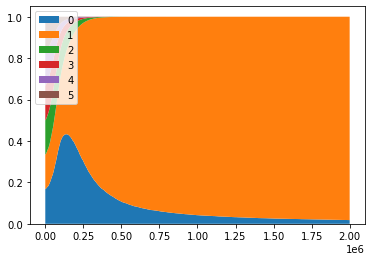

0:  0.02132601923430817
1:  0.9786739807649631
2:  4.832554624916737e-13
3:  1.4360510591422148e-13
4:  6.479804609280163e-14
5:  3.6971278912034546e-14


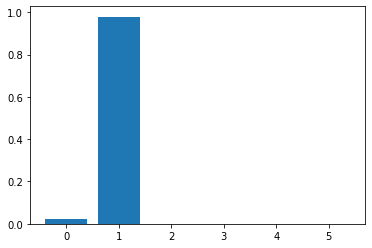

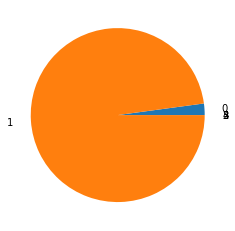

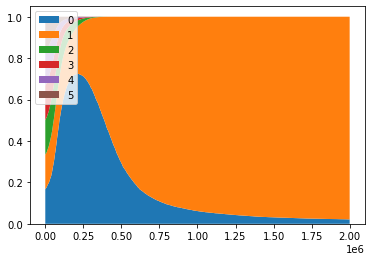

0:  0.019742296399773904
1:  0.9802577035721661
2:  1.808225157038076e-11
3:  5.546656515305798e-12
4:  2.7207111329733893e-12
5:  1.7103429600944294e-12


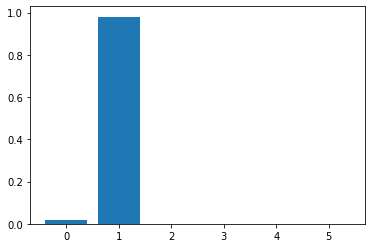

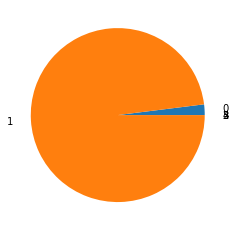

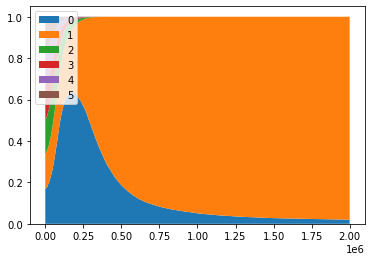

評価用--------------------
[100, 0]
要素なし


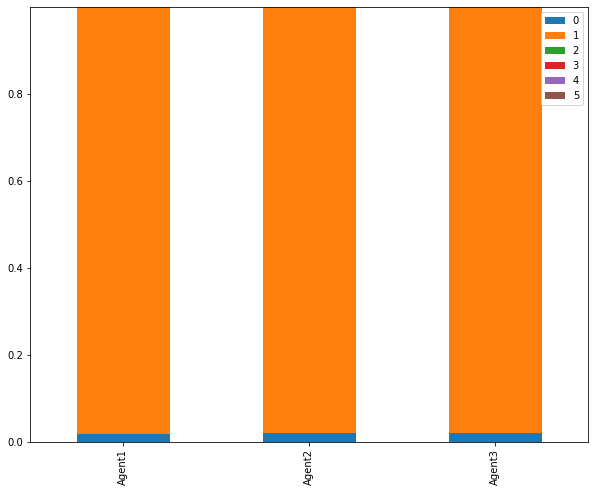

In [ ]:
#ノルマに足りなかった分の没収
#実験 5番B型 ノルマ3枚
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd
class Dealer:
    def __init__(self):
        self.noruma = 3 #ノルマです
    def keisan(self,actions):
        koukyouzai = sum(actions) #公共財の枚数
        if  koukyouzai < self.noruma: #未達成時の処理
          reward = [] #結果
          for a in actions:
            reward.append(5-a+2*koukyouzai/3-(3-koukyouzai))
          return reward
        else:
            reward = []
            for a in actions:
                reward.append(5-a+2*koukyouzai/3)
            return reward
class Tanzyun_Agent:
  def __init__(self):
    pass
  def acts(self):
    return 5
  def critic(self,reward):
    pass
  def decide_yusen(self):
    pass
  def decide_pi(self):
    pass
class Agent:
    def __init__(self):
        self.alpha = 0.01
        self.beta = 0.00005
        self.actions = [0,1,2,3,4,5]
        self.q_values = np.repeat(2,len(self.actions))
        self.pi = np.repeat(1/6,len(self.actions))
        self.last_action_id = None
        self.yusen = np.repeat(1/6,len(self.actions))
        self.delta = None
        self.pi_history= []
        self.yusen_history = []
        self.reward_his = []
    def acts(self):
        action_id = np.random.choice(len(self.actions),p = self.pi)
        self.last_action_id = action_id
        return action_id
    def decide_pi(self): 
        self.pi_history.append(copy.deepcopy(self.pi))
        bunbo = sum([np.e**aidx for aidx in self.yusen])
        self.pi = [np.e**aidx/bunbo for aidx in self.yusen]
    def critic(self,reward):
        self.delta = reward -self.q_values[self.last_action_id]
        self.q_values[self.last_action_id] = (1-self.alpha)*self.q_values[self.last_action_id] + self.alpha*reward
    def decide_yusen(self):
        self.yusen[self.last_action_id] = self.yusen[self.last_action_id] + self.beta*self.delta*(1-self.pi[self.last_action_id])
    
    
    def shuturyoku(self):
        for a, _ in enumerate(self.pi):
            print(str(a)+":  " +str(self.pi[a]))
        plt.bar(x =[0,1,2,3,4,5],height = self.pi)
        plt.show()
        #オレセン
        print()
        fig,ax = plt.subplots()
        labels = ["0","1","2","3","4","5"]
        ax.pie(self.pi,labels = labels,labeldistance = 1.2)
        print()
        labels = ["0","1","2","3","4","5"]
        pi0his = [self.pi_history[aidx][0] for aidx, _ in enumerate(self.pi_history)]
        pi1his = [self.pi_history[aidx][1] for aidx, _ in enumerate(self.pi_history)]
        pi2his = [self.pi_history[aidx][2] for aidx, _ in enumerate(self.pi_history)]
        pi3his = [self.pi_history[aidx][3] for aidx, _ in enumerate(self.pi_history)]
        pi4his = [self.pi_history[aidx][4] for aidx, _ in enumerate(self.pi_history)]
        pi5his = [self.pi_history[aidx][5] for aidx, _ in enumerate(self.pi_history)]
        fig,ax = plt.subplots()
        ax.stackplot(range(1,len(pi0his)+1),pi0his,pi1his,pi2his,pi3his,pi4his,pi5his,labels = labels)
        ax.legend(loc="upper left")
        plt.show()


if __name__ == "__main__":
    NB_EPISODE = 2000000
    agent1 = Agent()
    agent2 = Agent()
    agent3 = Agent()
    agents = [agent1,agent2,agent3]
    dealer = Dealer()
    for episode in range(NB_EPISODE):
        actions = [i.acts() for i in agents]
        reward = dealer.keisan(actions= actions)
        for q,_ in enumerate(agents):
            agents[q].critic(reward[q])
            agents[q].decide_yusen()
            agents[q].decide_pi()
    for t in agents:
      t.shuturyoku()
    
    #最後にそのルールを評価する
    hyouka = [0,0]
    heikin = []
    for k in range(100):
      actions = [i.acts() for i in agents]
      if sum(actions) < 9:
        hyouka[0] += 1
      else:
        if min(actions) < 3:
          hyouka[1] += 1
        else:
          heikin.append(sum(actions) -9)
    try:
      heikin_num = sum(heikin)/len(heikin)
    except ZeroDivisionError:
      heikin_num = "要素なし"
    print("評価用--------------------")
    print(hyouka)
    print(heikin_num)
    matrix = [agent1.pi,agent2.pi,agent3.pi]
    dataset = pd.DataFrame([list(x) for x in zip(*matrix)],columns=["Agent1","Agent2","Agent3"],index=["0","1","2","3","4","5"])
    fig, ax = plt.subplots(figsize=(10, 8))
    dataset.T.plot(kind='bar', stacked=True, ax=ax)
    plt.show()

0:  7.153549796940065e-61
1:  9.959315048202458e-61
2:  1.9590999458447284e-60
3:  7.723161462403195e-60
4:  0.974877735239783
5:  0.02512226476021707


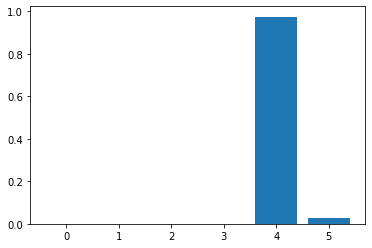

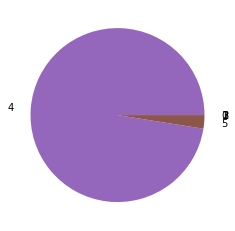

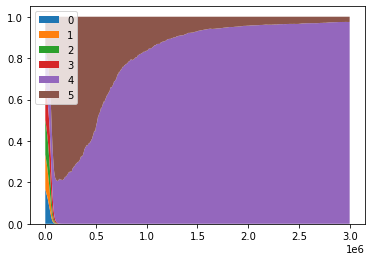

0:  2.2937276719879995e-56
1:  3.1837790216333216e-56
2:  5.979546162350761e-56
3:  1.7931760940314456e-55
4:  0.9750644553450348
5:  0.024935544654965152


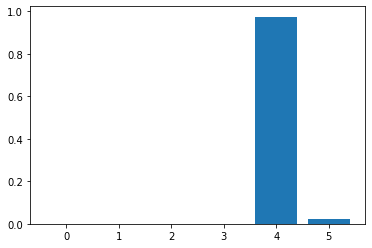

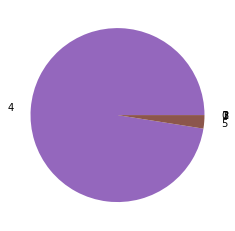

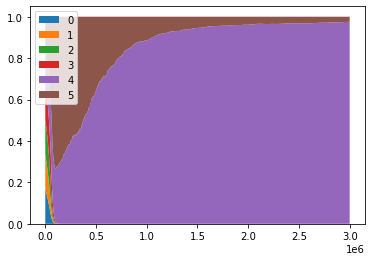

0:  1.0564433218153602e-64
1:  1.5536639148802548e-64
2:  3.0650573597595605e-64
3:  8.68969098000319e-64
4:  0.9712434994051752
5:  0.028756500594824742


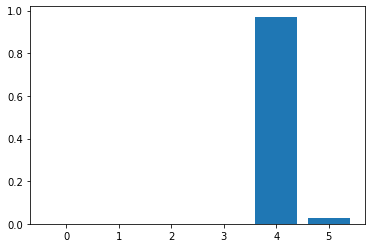

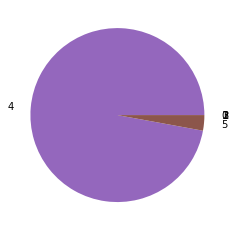

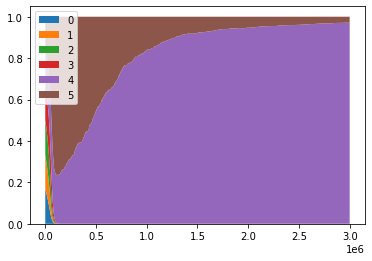

評価用--------------------
[0, 0]
3.06


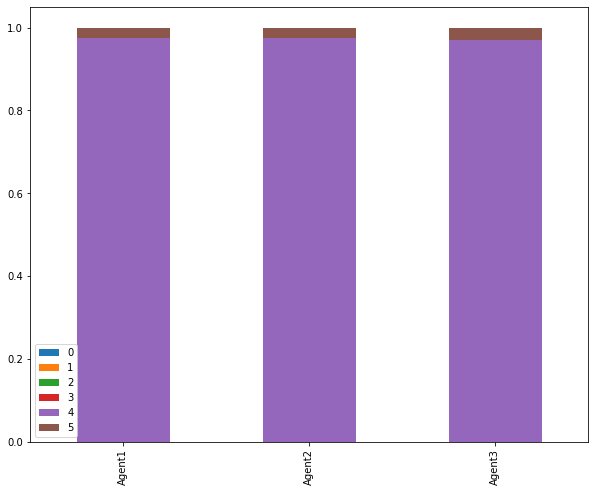

In [ ]:
#ノルマに足りなかった分の没収
#実験 6番B型 ノルマ12枚
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd
class Dealer:
    def __init__(self):
        self.noruma = 12 #ノルマです
    def keisan(self,actions):
        koukyouzai = sum(actions) #公共財の枚数
        if  koukyouzai < self.noruma: #未達成時の処理
          reward = [] #結果
          for a in actions:
            reward.append(5-a+2*koukyouzai/3-1*(12-koukyouzai))
          return reward
        else:
            reward = []
            for a in actions:
                reward.append(5-a+2*koukyouzai/3)
            return reward
class Tanzyun_Agent:
  def __init__(self):
    pass
  def acts(self):
    return 5
  def critic(self,reward):
    pass
  def decide_yusen(self):
    pass
  def decide_pi(self):
    pass
class Agent:
    def __init__(self):
        self.alpha = 0.01
        self.beta = 0.00005
        self.actions = [0,1,2,3,4,5]
        self.q_values = np.repeat(2,len(self.actions))
        self.pi = np.repeat(1/6,len(self.actions))
        self.last_action_id = None
        self.yusen = np.repeat(1/6,len(self.actions))
        self.delta = None
        self.pi_history= []
        self.yusen_history = []
        self.reward_his = []
    def acts(self):
        action_id = np.random.choice(len(self.actions),p = self.pi)
        self.last_action_id = action_id
        return action_id
    def decide_pi(self): 
        self.pi_history.append(copy.deepcopy(self.pi))
        bunbo = sum([np.e**aidx for aidx in self.yusen])
        self.pi = [np.e**aidx/bunbo for aidx in self.yusen]
    def critic(self,reward):
        self.delta = reward -self.q_values[self.last_action_id]
        self.q_values[self.last_action_id] = (1-self.alpha)*self.q_values[self.last_action_id] + self.alpha*reward
    def decide_yusen(self):
        self.yusen[self.last_action_id] = self.yusen[self.last_action_id] + self.beta*self.delta*(1-self.pi[self.last_action_id])
    
    
    def shuturyoku(self):
        for a, _ in enumerate(self.pi):
            print(str(a)+":  " +str(self.pi[a]))
        plt.bar(x =[0,1,2,3,4,5],height = self.pi)
        plt.show()
        #オレセン
        print()
        fig,ax = plt.subplots()
        labels = ["0","1","2","3","4","5"]
        ax.pie(self.pi,labels = labels,labeldistance = 1.2)
        print()
        labels = ["0","1","2","3","4","5"]
        pi0his = [self.pi_history[aidx][0] for aidx, _ in enumerate(self.pi_history)]
        pi1his = [self.pi_history[aidx][1] for aidx, _ in enumerate(self.pi_history)]
        pi2his = [self.pi_history[aidx][2] for aidx, _ in enumerate(self.pi_history)]
        pi3his = [self.pi_history[aidx][3] for aidx, _ in enumerate(self.pi_history)]
        pi4his = [self.pi_history[aidx][4] for aidx, _ in enumerate(self.pi_history)]
        pi5his = [self.pi_history[aidx][5] for aidx, _ in enumerate(self.pi_history)]
        fig,ax = plt.subplots()
        ax.stackplot(range(1,len(pi0his)+1),pi0his,pi1his,pi2his,pi3his,pi4his,pi5his,labels = labels)
        ax.legend(loc="upper left")
        plt.show()


if __name__ == "__main__":
    NB_EPISODE = 3000000
    agent1 = Agent()
    agent2 = Agent()
    agent3 = Agent()
    agents = [agent1,agent2,agent3]
    dealer = Dealer()
    for episode in range(NB_EPISODE):
        actions = [i.acts() for i in agents]
        reward = dealer.keisan(actions= actions)
        for q,_ in enumerate(agents):
            agents[q].critic(reward[q])
            agents[q].decide_yusen()
            agents[q].decide_pi()
    for t in agents:
      t.shuturyoku()
    
    #最後にそのルールを評価する
    hyouka = [0,0]
    heikin = []
    for k in range(100):
      actions = [i.acts() for i in agents]
      if sum(actions) < 9:
        hyouka[0] += 1
      else:
        if min(actions) < 3:
          hyouka[1] += 1
        else:
          heikin.append(sum(actions) -9)
    try:
      heikin_num = sum(heikin)/len(heikin)
    except ZeroDivisionError:
      heikin_num = "要素なし"
    print("評価用--------------------")
    print(hyouka)
    print(heikin_num)
    matrix = [agent1.pi,agent2.pi,agent3.pi]
    dataset = pd.DataFrame([list(x) for x in zip(*matrix)],columns=["Agent1","Agent2","Agent3"],index=["0","1","2","3","4","5"])
    fig, ax = plt.subplots(figsize=(10, 8))
    dataset.T.plot(kind='bar', stacked=True, ax=ax)
    plt.show()